In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("../data/crop_recommendation.csv")

In [134]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [135]:
# df["label"].nunique()
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [136]:
count_crop = df["label"].unique()
unique = len(count_crop)
print("Number of crops available is" ,unique,".")



Number of crops available is 22 .


In [137]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [138]:
print("Minimum Nitrogen Value(kg/ha):" ,df["N"].min())
print("Maximum Nitrogen Value(kg/ha):" ,df["N"].max())
print("Minimum Phosphorus Value(kg/ha):" ,df["P"].min())
print("Maximum Nitrogen Value(kg/ha):" ,df["N"].max())
print("Minimum Potassium Value(kg/ha):" ,df["K"].min())
print("Maximum Potassium Value(kg/ha):" ,df["K"].max())
print("Maximum Phosphorus Value(kg/ha):" ,df["P"].max())


Minimum Nitrogen Value(kg/ha): 0
Maximum Nitrogen Value(kg/ha): 140
Minimum Phosphorus Value(kg/ha): 5
Maximum Nitrogen Value(kg/ha): 140
Minimum Potassium Value(kg/ha): 5
Maximum Potassium Value(kg/ha): 205
Maximum Phosphorus Value(kg/ha): 145


Converting float to integer

In [139]:
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(int)
df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20,82,6,202,rice
1,85,58,41,21,80,7,226,rice
2,60,55,44,23,82,7,263,rice
3,74,35,40,26,80,6,242,rice
4,78,42,42,20,81,7,262,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26,66,6,177,coffee
2196,99,15,27,27,56,6,127,coffee
2197,118,33,30,24,67,6,173,coffee
2198,117,32,34,26,52,6,127,coffee


In [140]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20,82,6,202,rice
1,85,58,41,21,80,7,226,rice
2,60,55,44,23,82,7,263,rice
3,74,35,40,26,80,6,242,rice
4,78,42,42,20,81,7,262,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26,66,6,177,coffee
2196,99,15,27,27,56,6,127,coffee
2197,118,33,30,24,67,6,173,coffee
2198,117,32,34,26,52,6,127,coffee


In [141]:
df["label"] = df["label"].map({
    "rice": 1,
    "maize": 2,
    "chickpea": 3,
    "kidneybeans": 4,
    "pigeonpeas": 5,
    "mothbeans": 6,
    "mungbean": 7,
    "blackgram": 8,
    "lentil": 9,
    "pomegranate": 10,
    "banana": 11,
    "mango": 12,
    "grapes": 13,
    "watermelon": 14,
    "muskmelon": 15,
    "apple": 16,
    "orange": 17,
    "papaya": 18,
    "coconut": 19,
    "cotton": 20,
    "jute": 21,
    "coffee": 22
})
df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20,82,6,202,1
1,85,58,41,21,80,7,226,1
2,60,55,44,23,82,7,263,1
3,74,35,40,26,80,6,242,1
4,78,42,42,20,81,7,262,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26,66,6,177,22
2196,99,15,27,27,56,6,127,22
2197,118,33,30,24,67,6,173,22
2198,117,32,34,26,52,6,127,22


In [142]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Check Features Ranges


In [143]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.120000,70.976364,5.950000,102.970000,11.500000
std,36.917334,32.985883,50.647931,5.062696,22.263427,0.824395,54.948949,6.345731
min,0.000000,5.000000,5.000000,8.000000,14.000000,3.000000,20.000000,1.000000
25%,21.000000,28.000000,20.000000,22.000000,60.000000,5.000000,64.000000,6.000000
50%,37.000000,51.000000,32.000000,25.000000,80.000000,6.000000,94.000000,11.500000
75%,84.250000,68.000000,49.000000,28.000000,89.000000,6.000000,124.000000,17.000000
max,140.000000,145.000000,205.000000,43.000000,99.000000,9.000000,298.000000,22.000000


### Observations from the Data
Wide Ranges of Feature Values:

N: 0 to 140 (range = 140)
P: 5 to 145 (range = 140)
K: 5 to 205 (range = 200)
Rainfall: 20 to 298 (range = 278)
These features have significantly different ranges, which makes scaling important for models sensitive to feature magnitudes (e.g., neural networks, KNN).
Smaller Ranges:

Temperature: 8 to 43 (range = 35)
Humidity: 14 to 99 (range = 85)
pH: 3 to 9 (range = 6)
While these features have smaller ranges compared to N, P, K, and Rainfall, they still vary enough to require scaling to bring them into a uniform range.
Target Variable (Label):

The label is categorical (1 to 22) and doesn’t need scaling. It should remain as an integer or encoded format for modeling.
Standard Deviation:

Features like K (std = 50.65) and Rainfall (std = 54.95) have high standard deviations compared to others. This confirms that these features can dominate learning without scaling.

### Recommended Scaling Method

##### Min-Max Scaling
Best suited here because:
It preserves the original distribution of the data.
It scales features to a fixed range [0, 1], ensuring uniformity for algorithms like neural networks and reinforcement learning.

##### ALternative
Standardization (Z-score Scaling)
Alternative if the dataset contains outliers or if models like SVM or PCA are planned, as it scales data to have a mean of 0 and a standard deviation of 1.

-----------------------------------------------------------------------------------------------------------------------------------

### Identify Outliers Using Statistical Methods
IQR (Interquartile Range) Method
Outliers are typically defined as values lying outside 

𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
]
[Q1−1.5×IQR,Q3+1.5×IQR], where:


Q1 = 25th percentile
Q3 = 75th percentile


IQR=Q3−Q1

In [144]:
# Compute IQR for each feature
Q1 = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]].quantile(0.25)
Q3 = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]] < (Q1 - 1.5 * IQR)) | 
            (df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Count of outliers per feature


N                0
P              138
K              200
temperature     76
humidity        56
ph              66
rainfall        97
dtype: int64


### Blox plot to visualize outliers


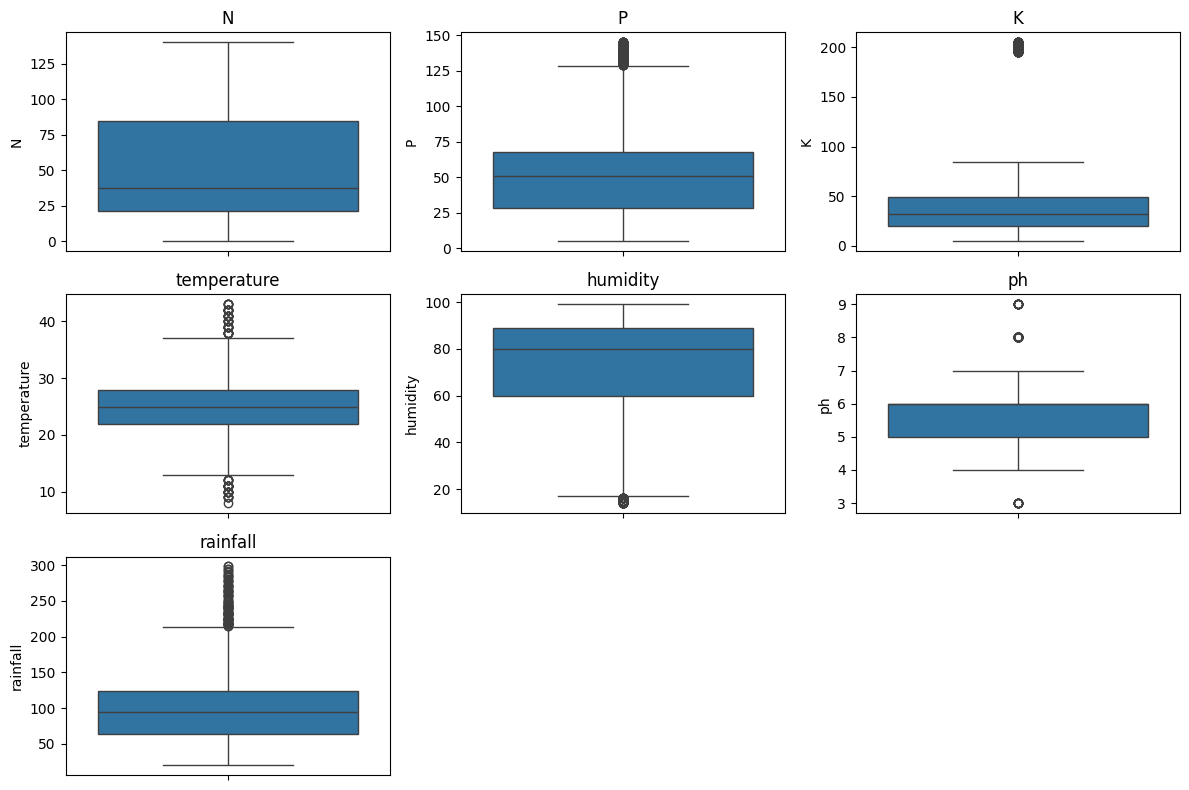

In [145]:


# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(["N", "P", "K", "temperature", "humidity", "ph", "rainfall"], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


In [146]:
# ....Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Cap outliers
# df_capped = df.copy()
# for col in ["P", "K", "temperature", "humidity", "ph", "rainfall"]:
#     lower_bound = Q1[col] - 1.5 * IQR[col]
#     upper_bound = Q3[col] + 1.5 * IQR[col]
#     df_capped[col] = df_capped[col].clip(lower_bound, upper_bound)


In [147]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.120000,70.976364,5.950000,102.970000,11.500000
std,36.917334,32.985883,50.647931,5.062696,22.263427,0.824395,54.948949,6.345731
min,0.000000,5.000000,5.000000,8.000000,14.000000,3.000000,20.000000,1.000000
25%,21.000000,28.000000,20.000000,22.000000,60.000000,5.000000,64.000000,6.000000
50%,37.000000,51.000000,32.000000,25.000000,80.000000,6.000000,94.000000,11.500000
75%,84.250000,68.000000,49.000000,28.000000,89.000000,6.000000,124.000000,17.000000
max,140.000000,145.000000,205.000000,43.000000,99.000000,9.000000,298.000000,22.000000


Using Standarization

In [148]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the features
df_scaled = scaler.fit_transform(df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]])

# Convert the scaled values back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"])

# If you want to include the label column back:
df_scaled["label"] = df["label"]


In [149]:
df_scaled.describe()


,N,P,K,temperature,humidity,ph,rainfall,label
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2200.000000
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,-1.937844e-16,3.100550e-16,-2.067033e-16,2.583792e-17,11.500000
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,6.345731
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.382367e+00,-2.559773e+00,-3.579195e+00,-1.510290e+00,1.000000
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-6.164126e-01,-4.931343e-01,-1.152622e+00,-7.093650e-01,6.000000
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-2.370818e-02,4.054042e-01,6.066433e-02,-1.632795e-01,11.500000
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.689962e-01,8.097466e-01,6.066433e-02,3.828059e-01,17.000000
max,2.423483e+00,2.778707e+00,3.097591e+00,3.532518e+00,1.259016e+00,3.700524e+00,3.550101e+00,22.000000


### Train Test Split


In [150]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random

In [187]:
X = df_scaled.iloc[:, :-1].values  # All columns except the last one (features)
y = df_scaled.iloc[:, -1].values   # The last column (labels)


In [188]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [189]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1760, 7)
(440, 7)
(1760,)
(440,)


## Implementing DQN

In [190]:
class DQN(nn.Module):
    def __init__(self, state_size=7, action_size=22):  # Updated state_size and action_size
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)  # First layer expects 7 features as input
        self.fc2 = nn.Linear(128, 128)         # Hidden layer
        self.fc3 = nn.Linear(128, action_size)  # Output layer, 22 possible actions (crops)

    def forward(self, state):
        x = torch.relu(self.fc1(state))  # Apply ReLU activation function after first layer
        x = torch.relu(self.fc2(x))      # Apply ReLU activation function after second layer
        x = self.fc3(x)                  # Output layer (Q-values for each action)
        return x


##### Setup the DQN Algorithm

In [196]:
class CropEnvironment:
    def __init__(self, data, labels):
        self.data = data  # NumPy array or list of features
        self.labels = labels  # Corresponding labels
        self.current_step = 0

    def reset(self):
        self.current_step = 0
        return self.data[self.current_step]  # Accessing the state using NumPy indexing

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.data):
            done = True
            self.current_step = 0  # Reset for the next episode
        else:
            done = False
        next_state = self.data[self.current_step]  # Access next state using NumPy indexing
        reward = self.get_reward(action)
        return next_state, reward, done, {}

    def get_reward(self, action):
        # Reward function based on action
        if action == 2:
            return 1  # Example: action 2 yields a better outcome
        elif action == 0:
            return -1  # Negative reward for action 0
        else:
            return -0.5  # Slight penalty for action 1


#### Training Loop


In [197]:
def store_experience(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))


def sample_batch(batch_size):
    return random.sample(memory, batch_size)


Memory Initialization


In [198]:
import random
from collections import deque

# Initialize memory buffer (experience replay)
memory = deque(maxlen=10000)  # maxlen limits the buffer size (optional)


In [199]:
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparameters
gamma = 0.99  # Discount factor
epsilon_decay = 0.995
min_epsilon = 0.01
batch_size = 64
learning_rate = 0.001
epsilon = 1.0  # Initial epsilon (exploration)

# Memory buffer
memory = deque(maxlen=10000)  # You can change the maxlen as per your requirement

# Define the DQN model and target network
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize networks and optimizer
state_size = 7  # Based on your feature size (e.g., N, P, K, temperature, humidity, ph, rainfall)
action_size = 22  # Based on the number of possible actions (you may need to adjust)
dqn = DQN(state_size, action_size)
target_network = DQN(state_size, action_size)  # Target network for stability
target_network.load_state_dict(dqn.state_dict())  # Initialize target network
optimizer = optim.Adam(dqn.parameters(), lr=learning_rate)

# Experience storage functions
def store_experience(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

def sample_batch(batch_size):
    return random.sample(memory, batch_size)

# Train function
def train_dqn(env, dqn, episodes=2000):
    global epsilon
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Exploration-exploitation trade-off
            if np.random.rand() < epsilon:
                action = np.random.choice(action_size)  # Random action (exploration)
            else:
                state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
                q_values = dqn(state_tensor)
                action = torch.argmax(q_values).item()  # Best action (exploitation)

            next_state, reward, done, _ = env.step(action)

            # Store experience
            store_experience(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward

            # Train from experience replay if enough samples are available
            if len(memory) > batch_size:
                batch = sample_batch(batch_size)

                states, actions, rewards, next_states, dones = zip(*batch)
                states = torch.tensor(states, dtype=torch.float32)
                next_states = torch.tensor(next_states, dtype=torch.float32)
                actions = torch.tensor(actions)
                rewards = torch.tensor(rewards)
                dones = torch.tensor(dones)

                # Calculate Q-values
                q_values = dqn(states).gather(1, actions.unsqueeze(1))  
                next_q_values = target_network(next_states).max(1)[0].detach()  
                target = rewards + (gamma * next_q_values * (1 - dones.float()))  

                # Compute loss and backpropagate
                loss = nn.MSELoss()(q_values.squeeze(), target)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # Update target network periodically (every 10 episodes)
        if episode % 10 == 0:
            target_network.load_state_dict(dqn.state_dict())

        # Decay epsilon after each episode
        epsilon = max(epsilon * epsilon_decay, min_epsilon)

        # Print episode result
        print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon}")



In [200]:
train_env = CropEnvironment(X, y)
train_dqn(train_env, dqn) 

Episode 0, Total Reward: -994.5, Epsilon: 0.995
Episode 1, Total Reward: -972.5, Epsilon: 0.990025
Episode 2, Total Reward: -979.0, Epsilon: 0.985074875
Episode 3, Total Reward: -955.0, Epsilon: 0.9801495006250001
Episode 4, Total Reward: -932.5, Epsilon: 0.9752487531218751
Episode 5, Total Reward: -939.0, Epsilon: 0.9703725093562657
Episode 6, Total Reward: -867.5, Epsilon: 0.9655206468094844
Episode 7, Total Reward: -898.5, Epsilon: 0.960693043575437
Episode 8, Total Reward: -843.5, Epsilon: 0.9558895783575597
Episode 9, Total Reward: -900.0, Epsilon: 0.9511101304657719
Episode 10, Total Reward: -846.5, Epsilon: 0.946354579813443
Episode 11, Total Reward: -837.5, Epsilon: 0.9416228069143757
Episode 12, Total Reward: -790.5, Epsilon: 0.9369146928798039
Episode 13, Total Reward: -798.5, Epsilon: 0.9322301194154049
Episode 14, Total Reward: -743.0, Epsilon: 0.9275689688183278
Episode 15, Total Reward: -737.5, Epsilon: 0.9229311239742362
Episode 16, Total Reward: -731.5, Epsilon: 0.91831

In [201]:
torch.save(dqn.state_dict(), "../model/DQN/final_dqn_model.pth")



### Evaluation

In [243]:
def test_agent(env, dqn, episodes = 1000):
    total_rewards = []
    # elipson = 0

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            q_values = dqn(state_tensor)
            action = torch.argmax(q_values).item()  

            
            next_state, reward, done, _ = env.step(action)
            state = next_state
            total_reward += reward

        total_rewards.append(total_reward)

    return total_rewards


In [ ]:
test_env = CropEnvironment(X_test, y_test)  

test_rewards = test_agent(test_env, dqn,episodes = 50)

print(f"Average Test Reward over 50 episodes: {np.mean(test_rewards)}")


Average Test Reward over 50 episodes: 276.5


In [ ]:
test_env = CropEnvironment(X_test, y_test) 

test_rewards = test_agent(test_env, dqn, episodes=2500)

print(f"Average Test Reward over 2500 episodes: {np.mean(test_rewards)}")

Average Test Reward over 2500 episodes: 276.5


In [220]:
test_env = CropEnvironment(X_test, y_test) 

test_rewards = test_agent(test_env, dqn, episodes=5000)

print(f"Average Test Reward over 5000 episodes: {np.mean(test_rewards)}")


Average Test Reward over 5000 episodes: 276.5


In [240]:
test_env = CropEnvironment(X_test, y_test)  

test_rewards = test_agent(test_env, dqn)

print(f"Average Test Reward over 1 episodes: {np.mean(test_rewards)}")

Average Test Reward over 1 episodes: 276.5
